# Modelling

In [1]:
import pandas   as pd
import numpy    as np

In [2]:
df = pd.read_csv("../data/3.preprocessed/tweet_preprocessed_noNaN.csv")
df.head(5)

,text,text_cleaned,text_removal,text_normalized,text_manual_replaced,text_without_stopword,label
0,"Sibuk liburan luar negeri, pulang2 bawa omicro...",sibuk liburan luar negeri pulang bawa omicron ...,sibuk libur negeri pulang bawa omicron ppkm in...,sibuk libur negeri pulang bawa omicron ppkm in...,sibuk libur negeri pulang bawa omicron ppkm in...,sibuk libur negeri pulang bawa omicron ppkm in...,0
1,"Cegah Omicron, Wapres : tidak boleh ada diapen...",cegah omicron wapres tidak boleh ada diapensas...,cegah omicron wapres diapensasi karantina,cegah omicron wapres diapensasi karantina,cegah omicron wapres diapensasi karantina,cegah omicron wapres diapensasi karantina,1
2,"Gk tau omicron, gua tau nya unicorn",gk tau omicron gua tau nya unicorn,gk tau omicron gua tau unicorn,enggak tahu omicron saya tahu unicorn,enggak tahu omicron aku tahu unicorn,tidak tahu omicron aku tahu unicorn,1
3,"itukan tugas mereka, hampir semua artis itukan...",itukan tugas mereka hampir semua artis itukan ...,tugas artis influencer rezim jokowi varian del...,tugas artis influencer rezim jokowi varian del...,tugas artis influencer rezim jokowi varian del...,tugas artis influencer rezim jokowi varian del...,0
4,"kalo gini mana bisa kuliah offline, orang omic...",kalo gini mana bisa kuliah offline orang omicr...,kalo gin kuliah offline omicron dah sampe indo,kalau gin kuliah offline omicron deh sampai in...,kalau gini kuliah offline omicron deh sampai i...,kalau begini kuliah offline omicron deh sampai...,1


In [3]:
X_stopwords = df["text_manual_replaced"]
X_without_stopwords = df["text_without_stopword"]
X_stopwords.shape, X_without_stopwords.shape 

((1177,), (1177,))

In [4]:
y_stopwords = df["label"]
y_without_stopwords = df["label"]

In [5]:
# Train test split
from sklearn.model_selection import train_test_split

X_train_stop, X_test_stop, y_train_stop, y_test_stop = train_test_split(
    X_stopwords, y_stopwords, test_size=0.2, random_state=42)

X_train_without_stop, X_test_without_stop, y_train_without_stop, y_test_without_stop = train_test_split(
    X_without_stopwords, y_without_stopwords, test_size=0.2, random_state=42)


## Feature Extraction

In [6]:
# Feature extraction tf idf
from sklearn.feature_extraction.text import TfidfVectorizer

vec_stop = TfidfVectorizer()
vec_without_stop = TfidfVectorizer()

X_train_stop_tf = vec_stop.fit_transform(X_train_stop)
X_test_stop_tf = vec_stop.transform(X_test_stop)

X_train_stop_tf.shape, X_test_stop_tf.shape

((941, 2552), (236, 2552))

In [7]:
X_train_without_stop_tf = vec_without_stop.fit_transform(X_train_without_stop)
X_test_without_stop_tf = vec_without_stop.transform(X_test_without_stop)

X_train_without_stop_tf.shape, X_test_without_stop_tf.shape

((941, 2482), (236, 2482))

In [8]:
vec = TfidfVectorizer()
X_without_stopwords_tf = vec.fit_transform(X_without_stopwords)
X_without_stopwords_tf.shape

(1177, 2881)

D:\Anaconda\envs\DataScience\lib\site-packages\sklearn\utils\validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
D:\Anaconda\envs\DataScience\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

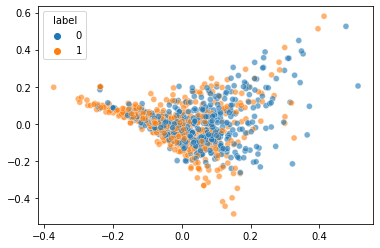

In [9]:
# PCA
from sklearn.decomposition import PCA
import seaborn as sns

pca = PCA(n_components=2).fit_transform(X_without_stopwords_tf.todense())
sns.scatterplot(pca[:, 0], pca[:, 1], hue=y_without_stopwords, alpha=0.6)


In [10]:
pca_3d = PCA(n_components=3).fit_transform(X_without_stopwords_tf.todense())

D:\Anaconda\envs\DataScience\lib\site-packages\sklearn\utils\validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


C:\Users\user\AppData\Local\Temp/ipykernel_14124/427153930.py:7: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


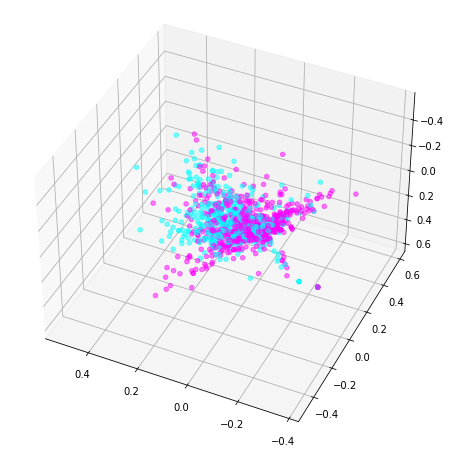

In [11]:
# PCA
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(6, 6))
ax = Axes3D(fig)
fig.add_axes(ax)


g = ax.scatter(pca_3d[:, 0], pca_3d[:, 1], pca_3d[:, 2],
               c=y_without_stopwords, cmap='cool', alpha=0.5)
ax.view_init(-140, 65)
plt.show()

D:\Anaconda\envs\DataScience\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
D:\Anaconda\envs\DataScience\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
D:\Anaconda\envs\DataScience\lib\site-packages\sklearn\utils\validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
D:\Anaconda\envs\DataScience\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misin

<AxesSubplot:>

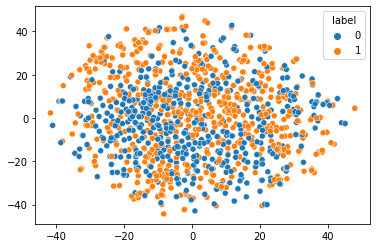

In [12]:
# TSNE
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2).fit_transform(X_without_stopwords_tf.todense())
sns.scatterplot(tsne[:, 0], tsne[:, 1], hue=y_without_stopwords)


In [13]:
tsne_3d = TSNE(n_components=3).fit_transform(X_without_stopwords_tf.todense())

D:\Anaconda\envs\DataScience\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
D:\Anaconda\envs\DataScience\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
D:\Anaconda\envs\DataScience\lib\site-packages\sklearn\utils\validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


C:\Users\user\AppData\Local\Temp/ipykernel_14124/1465169221.py:2: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


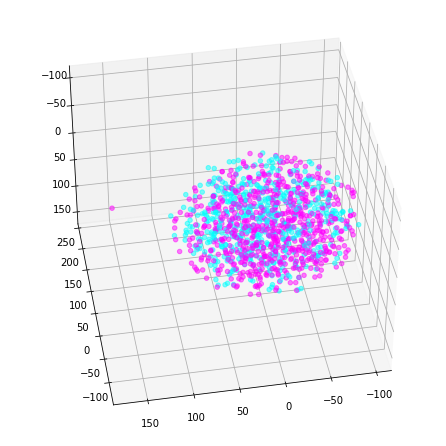

In [14]:
fig = plt.figure(figsize=(6, 6))
ax = Axes3D(fig)
fig.add_axes(ax)

g = ax.scatter(tsne_3d[:, 0], tsne_3d[:, 1], tsne_3d[:, 2],
               c=y_without_stopwords, cmap='cool', alpha=0.5)
ax.view_init(-140, 100)
plt.show()

## Baseline modeling

In [15]:
# Baseline modeling
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# metrics
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

import warnings
warnings.filterwarnings("ignore")

models = [("Logistic Regression", LogisticRegression()),
            ("SGD", SGDClassifier()),
            ("SVC", SVC()),
            ("Random Forest", RandomForestClassifier()),
            ("Gradient Boosting", GradientBoostingClassifier()),
            ("AdaBoost", AdaBoostClassifier()),
            ("Bagging", BaggingClassifier()),
            ("Extra Trees", ExtraTreesClassifier()),
            ("XGBoost", XGBClassifier(verbosity=0, silent=True)),
            ("LightGBM", LGBMClassifier()),
            ("KNN", KNeighborsClassifier()),
            ("Voting", VotingClassifier(estimators=[
                ("Logistic Regression", LogisticRegression()),
                ("SGD", SGDClassifier()),
                ("SVC", SVC()),
                ("Random Forest", RandomForestClassifier()),
                ("Gradient Boosting", GradientBoostingClassifier()),
                ("AdaBoost", AdaBoostClassifier()),
                ("Bagging", BaggingClassifier()),
                ("Extra Trees", ExtraTreesClassifier()),
                ("XGBoost", XGBClassifier()),
                ("LightGBM", LGBMClassifier()),
                ("KNN", KNeighborsClassifier())])
            )
]

print("""

=========================================

With stopwords

""")

test_results_stopword = []

for model in models:
    model_name = model[0]
    model_obj = model[1]

    model_obj.fit(X_train_stop_tf, y_train_stop)
    y_pred = model_obj.predict(X_test_stop_tf)
    f1 = f1_score(y_test_stop, y_pred, average="macro")
    precision = precision_score(y_test_stop, y_pred, average="macro")
    recall = recall_score(y_test_stop, y_pred, average="macro")
    print(f"{model_name}: {f1:.3f} - {precision:.3f} - {recall:.3f}")
    test_results_stopword.append((model_name, f1, precision, recall))

print("""

=========================================

Without stopwords

""")

test_results_without_stopword = []

for model in models:
    model_name = model[0]
    model_obj = model[1]

    model_obj.fit(X_train_without_stop_tf, y_train_without_stop)
    y_pred = model_obj.predict(X_test_without_stop_tf)
    f1 = f1_score(y_test_stop, y_pred, average="macro")
    precision = precision_score(y_test_stop, y_pred, average="macro")
    recall = recall_score(y_test_stop, y_pred, average="macro")
    print(f"{model_name}: {f1:.3f} - {precision:.3f} - {recall:.3f}")
    test_results_without_stopword.append((model_name, f1, precision, recall))




With stopwords


Logistic Regression: 0.709 - 0.713 - 0.706
SGD: 0.632 - 0.631 - 0.635
SVC: 0.694 - 0.704 - 0.688
Random Forest: 0.665 - 0.666 - 0.665
Gradient Boosting: 0.628 - 0.638 - 0.624
AdaBoost: 0.599 - 0.611 - 0.597
Bagging: 0.641 - 0.641 - 0.651
Extra Trees: 0.695 - 0.699 - 0.693
XGBoost: 0.621 - 0.620 - 0.623
LightGBM: 0.567 - 0.566 - 0.568
KNN: 0.622 - 0.626 - 0.620
Voting: 0.692 - 0.698 - 0.688



Without stopwords


Logistic Regression: 0.714 - 0.718 - 0.711
SGD: 0.645 - 0.643 - 0.648
SVC: 0.703 - 0.714 - 0.698
Random Forest: 0.682 - 0.689 - 0.678
Gradient Boosting: 0.634 - 0.643 - 0.630
AdaBoost: 0.577 - 0.579 - 0.576
Bagging: 0.672 - 0.670 - 0.682
Extra Trees: 0.675 - 0.676 - 0.674
XGBoost: 0.619 - 0.618 - 0.625
LightGBM: 0.585 - 0.584 - 0.586
KNN: 0.628 - 0.629 - 0.628
Voting: 0.673 - 0.679 - 0.669


In [16]:
test_results_stopword = pd.DataFrame(test_results_stopword, columns=["model", "f1_score", "precision", "recall"])
test_results_without_stopword = pd.DataFrame(test_results_without_stopword, columns=["model", "f1_score", "precision", "recall"])

In [17]:
test_results_stopword.sort_values(by="f1_score", ascending=False, inplace=True)
test_results_stopword

,model,f1_score,precision,recall
0,Logistic Regression,0.708642,0.712918,0.705514
7,Extra Trees,0.695436,0.698662,0.692982
2,SVC,0.693606,0.703591,0.688283
11,Voting,0.691764,0.698427,0.687657
3,Random Forest,0.665485,0.666455,0.664630
6,Bagging,0.641317,0.640740,0.651003
1,SGD,0.632208,0.630656,0.635025
4,Gradient Boosting,0.627676,0.637638,0.624217
10,KNN,0.621795,0.625658,0.619674
8,XGBoost,0.621320,0.620156,0.623120


In [18]:
test_results_without_stopword.sort_values(by="f1_score", ascending=False, inplace=True)
test_results_without_stopword

,model,f1_score,precision,recall
0,Logistic Regression,0.714178,0.717689,0.711466
2,SVC,0.703181,0.713584,0.697525
3,Random Forest,0.682279,0.688654,0.678415
7,Extra Trees,0.674778,0.675800,0.673872
11,Voting,0.672795,0.678882,0.669173
6,Bagging,0.671705,0.670032,0.682018
1,SGD,0.644990,0.643379,0.647556
4,Gradient Boosting,0.633750,0.643029,0.630169
10,KNN,0.628317,0.629078,0.627663
8,XGBoost,0.619145,0.617926,0.624530


## Parameter Hypertuning

In [33]:
# Logistic regression without stopwords
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

logreg = LogisticRegression()
params_logreg = {'C': [0.001, 0.01, 0.1, 1.0, 10, 100, 1000],
            'penalty': ['none','l1', 'l2', 'elasticnet'],
            'solver': ['liblinear', 'saga', 'sag', 'newton-cg', 'lbfgs']}

grid_logreg = GridSearchCV(logreg, params_logreg,
                           cv=5, n_jobs=-1, verbose=1, scoring="f1_macro")
logreg_tuned = grid_logreg.fit(X_train_without_stop_tf, y_train_without_stop)

print("Best: %f using %s" %
      (logreg_tuned.best_score_, logreg_tuned.best_params_))


Fitting 5 folds for each of 140 candidates, totalling 700 fits
Best: 0.650064 using {'C': 10, 'penalty': 'l2', 'solver': 'saga'}


In [34]:
# SVC without stopwords
from sklearn.svm import SVC

svc = SVC()
params_svc = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
            'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
            'gamma': ['scale', 'auto']}

grid_svc = GridSearchCV(svc, params_svc, n_jobs=-1, cv=5, verbose=1, scoring="f1_macro")
svc_tuned = grid_svc.fit(X_train_without_stop_tf, y_train_without_stop)

print("Best: %f using %s" %
      (svc_tuned.best_score_, svc_tuned.best_params_))

Fitting 5 folds for each of 56 candidates, totalling 280 fits
Best: 0.669339 using {'C': 1000, 'gamma': 'auto', 'kernel': 'rbf'}


## Bidirectional LSTM Approach

In [62]:
from collections import Counter

def counter_word(text):
    c = Counter()
    for i in text.values:
        for word in i.split():
            c[word] += 1
    return c

NUM_WORDS_STOPWORDS = len(counter_word(X_stopwords))
NUM_WORDS_WITHOUT_STOPWORDS = len(counter_word(X_without_stopwords))
MAX_LENGTH = 35

In [63]:
from keras.preprocessing.text import Tokenizer

tokenizer_stopwords = Tokenizer(num_words=NUM_WORDS_STOPWORDS)
tokenizer_stopwords.fit_on_texts(X_train_stop)

word_index = tokenizer_stopwords.word_index
print('Found %s unique tokens.' % len(word_index))

Found 2552 unique tokens.


In [64]:
from keras.preprocessing.sequence import pad_sequences
X_train_stop_seq = tokenizer_stopwords.texts_to_sequences(X_train_stop)
X_train_stop_pad = pad_sequences(X_train_stop_seq, maxlen=MAX_LENGTH, padding='post', truncating='post')

In [65]:
from keras.preprocessing.text import Tokenizer

tokenizer_without_stopwords = Tokenizer(num_words=NUM_WORDS_WITHOUT_STOPWORDS)
tokenizer_without_stopwords.fit_on_texts(X_train_without_stop)

word_index = tokenizer_without_stopwords.word_index
print('Found %s unique tokens.' % len(word_index))

Found 2482 unique tokens.


In [66]:
from keras.preprocessing.sequence import pad_sequences
X_train_without_stop_seq = tokenizer_stopwords.texts_to_sequences(X_train_without_stop)
X_train_without_stop_pad = pad_sequences(
    X_train_without_stop_seq, maxlen=MAX_LENGTH, padding='post', truncating='post')

In [67]:
X_test_stop_seq = tokenizer_stopwords.texts_to_sequences(X_test_stop)
X_test_stop_pad = pad_sequences(X_test_stop_seq, maxlen=MAX_LENGTH, padding='post', truncating='post')

X_test_without_stop_seq = tokenizer_stopwords.texts_to_sequences(X_test_without_stop)
X_test_without_stop_pad = pad_sequences(X_test_without_stop_seq, maxlen=MAX_LENGTH, padding='post', truncating='post')

In [68]:
from keras import backend as K


def custom_f1(y_true, y_pred):
    def recall_m(y_true, y_pred):
        TP = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        Positives = K.sum(K.round(K.clip(y_true, 0, 1)))

        recall = TP / (Positives + K.epsilon())
        return recall

    def precision_m(y_true, y_pred):
        TP = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        Pred_Positives = K.sum(K.round(K.clip(y_pred, 0, 1)))

        precision = TP / (Pred_Positives + K.epsilon())
        return precision

    precision, recall = precision_m(y_true, y_pred), recall_m(y_true, y_pred)

    return 2 * ((precision * recall) / (precision + recall + K.epsilon()))


In [100]:
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D, Bidirectional

model_stop = Sequential()
model_stop.add(Embedding(NUM_WORDS_WITHOUT_STOPWORDS, 32, input_length=MAX_LENGTH))
model_stop.add(SpatialDropout1D(0.4))
model_stop.add(Bidirectional(LSTM(176, dropout=0.2, recurrent_dropout=0.2)))

model_stop.add(Dense(1, activation='sigmoid'))


model_stop.compile(optimizer="adam", loss='binary_crossentropy',
              metrics=[custom_f1])

In [101]:
model_stop.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_17 (Embedding)    (None, 35, 32)            92192     
                                                                 
 spatial_dropout1d_7 (Spatia  (None, 35, 32)           0         
 lDropout1D)                                                     
                                                                 
 bidirectional_6 (Bidirectio  (None, 352)              294272    
 nal)                                                            
                                                                 
 dense_21 (Dense)            (None, 1)                 353       
                                                                 
Total params: 386,817
Trainable params: 386,817
Non-trainable params: 0
_________________________________________________________________


In [102]:
model_without_stop = Sequential()
model_without_stop.add(Embedding(NUM_WORDS_WITHOUT_STOPWORDS, 32, input_length=MAX_LENGTH))
model_without_stop.add(SpatialDropout1D(0.4))
model_without_stop.add(Bidirectional(LSTM(176, dropout=0.2, recurrent_dropout=0.2)))

model_without_stop.add(Dense(1, activation='sigmoid'))

model_without_stop.compile(optimizer="adam", loss='binary_crossentropy',
                   metrics=[custom_f1])

In [103]:
model_without_stop.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_18 (Embedding)    (None, 35, 32)            92192     
                                                                 
 spatial_dropout1d_8 (Spatia  (None, 35, 32)           0         
 lDropout1D)                                                     
                                                                 
 bidirectional_7 (Bidirectio  (None, 352)              294272    
 nal)                                                            
                                                                 
 dense_22 (Dense)            (None, 1)                 353       
                                                                 
Total params: 386,817
Trainable params: 386,817
Non-trainable params: 0
_________________________________________________________________


In [104]:
history_stop = model_stop.fit(X_train_stop_pad, y_train_stop, epochs=10, batch_size=32, validation_data=(X_test_stop_pad, y_test_stop))

Epoch 1/10
30/30 [==============================] - 9s 206ms/step - loss: 0.6887 - custom_f1: 0.7035 - val_loss: 0.6754 - val_custom_f1: 0.7766
Epoch 2/10
30/30 [==============================] - 6s 194ms/step - loss: 0.6764 - custom_f1: 0.6962 - val_loss: 0.6451 - val_custom_f1: 0.7592
Epoch 3/10
30/30 [==============================] - 6s 194ms/step - loss: 0.5903 - custom_f1: 0.7718 - val_loss: 0.5834 - val_custom_f1: 0.7892
Epoch 4/10
30/30 [==============================] - 6s 198ms/step - loss: 0.4804 - custom_f1: 0.8089 - val_loss: 0.6890 - val_custom_f1: 0.6051
Epoch 5/10
30/30 [==============================] - 6s 202ms/step - loss: 0.3852 - custom_f1: 0.8414 - val_loss: 0.6102 - val_custom_f1: 0.7752
Epoch 6/10
30/30 [==============================] - 6s 199ms/step - loss: 0.3211 - custom_f1: 0.8769 - val_loss: 0.6818 - val_custom_f1: 0.6712
Epoch 7/10
30/30 [==============================] - 6s 196ms/step - loss: 0.2430 - custom_f1: 0.9119 - val_loss: 0.7626 - val_custom_f1:

In [105]:
history_without_stop = model_without_stop.fit(X_train_without_stop_pad, y_train_without_stop, epochs=10, batch_size=32, validation_data=(X_test_without_stop_pad, y_test_without_stop))

Epoch 1/10
30/30 [==============================] - 9s 204ms/step - loss: 0.6909 - custom_f1: 0.6857 - val_loss: 0.6783 - val_custom_f1: 0.7766
Epoch 2/10
30/30 [==============================] - 6s 188ms/step - loss: 0.6771 - custom_f1: 0.7120 - val_loss: 0.6530 - val_custom_f1: 0.7590
Epoch 3/10
30/30 [==============================] - 6s 189ms/step - loss: 0.6113 - custom_f1: 0.7453 - val_loss: 0.5730 - val_custom_f1: 0.7958
Epoch 4/10
30/30 [==============================] - 6s 191ms/step - loss: 0.5059 - custom_f1: 0.8021 - val_loss: 0.5638 - val_custom_f1: 0.7958
Epoch 5/10
30/30 [==============================] - 6s 189ms/step - loss: 0.3879 - custom_f1: 0.8422 - val_loss: 0.6132 - val_custom_f1: 0.7289
Epoch 6/10
30/30 [==============================] - 6s 187ms/step - loss: 0.2997 - custom_f1: 0.8860 - val_loss: 0.6219 - val_custom_f1: 0.7456
Epoch 7/10
30/30 [==============================] - 6s 188ms/step - loss: 0.2401 - custom_f1: 0.9130 - val_loss: 0.7533 - val_custom_f1:

## Keras Tuning

In [117]:
import kerastuner as kt
# from kerastuner.engine.hyperparameters import HyperParameters

def build_model(hp):
    model = Sequential()
    model.add(Embedding(NUM_WORDS_WITHOUT_STOPWORDS,32, input_length=MAX_LENGTH))
    model.add(Bidirectional(LSTM(hp.Int('input_unit', min_value=32, max_value=512, step=32), return_sequences=True)))
    for i in range(hp.Int('n_layers', 1, 4)):
        model.add(Bidirectional(LSTM(hp.Int(f'lstm_{i}_units', min_value=32, max_value=512, step=32), return_sequences=True)))
    model.add(Bidirectional(LSTM(hp.Int('layer_2_neurons', min_value=32, max_value=512, step=32))))
    model.add(
        Dropout(hp.Float('Dropout_rate', min_value=0, max_value=0.5, step=0.1)))
    model.add(Dense(1, activation=hp.Choice('dense_activation', values=['relu', 'sigmoid'], default='sigmoid')))
    model.compile(loss='binary_crossentropy',optimizer='adam', metrics=[custom_f1])
    return model


In [120]:

tuner = kt.RandomSearch(build_model,
                        kt.Objective('val_custom_f1', direction='max'),

                     max_trials=10,
                     executions_per_trial=1,
                     )


INFO:tensorflow:Reloading Oracle from existing project .\untitled_project\oracle.json


In [121]:
tuner.search(
    x=X_train_without_stop_pad,
    y=y_train_without_stop,
    epochs=20,
    batch_size=128,
    validation_data=(X_test_stop_pad, y_test_stop),
)

Trial 11 Complete [00h 11m 14s]
val_custom_f1: 0.7957051992416382

Best val_custom_f1 So Far: 0.7995229959487915
Total elapsed time: 01h 38m 07s
INFO:tensorflow:Oracle triggered exit


In [122]:
from tensorflow.keras.models import save_model

best_model = tuner.get_best_models(num_models=1)[0]
save_model(best_model,'../model/omicron-sentiment-analysis-indo.h5')

In [123]:
import pickle
pickle.dump(vec_without_stop, open('../model/tfidfvectorizer.pkl', 'wb'))


In [135]:
pickle.dump(tokenizer_without_stopwords, open('../model/tokenizer_without_stopwords.pkl', 'wb'))